Saving Covid.csv to Covid (3).csv
    Fever_No  Fever_Yes  ...  Breathing Issues_No  Breathing Issues_Yes
0          1          0  ...                    1                     0
1          0          1  ...                    0                     1
2          0          1  ...                    1                     0
3          0          1  ...                    0                     1
4          0          1  ...                    0                     1
5          1          0  ...                    1                     0
6          0          1  ...                    0                     1
7          0          1  ...                    0                     1
8          1          0  ...                    0                     1
9          0          1  ...                    1                     0
10         1          0  ...                    0                     1
11         1          0  ...                    0                     1
12         1          0  ...  

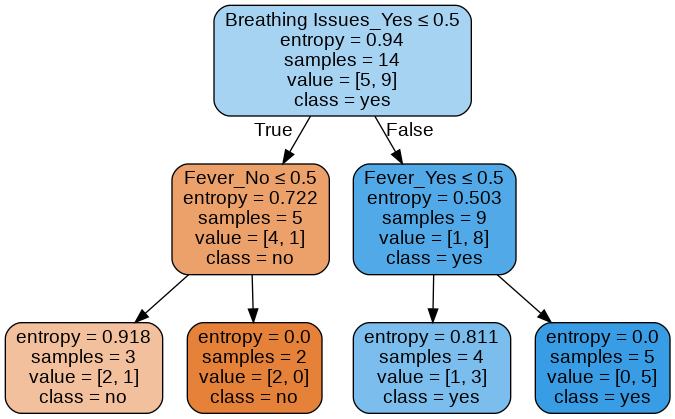

In [11]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculationimport warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import io
# load dataset
from google.colab import files
uploaded = files.upload()

df_playtennis= pd.read_csv(io.BytesIO(uploaded['Covid.csv']))



#split dataset in features and target variable
feature_cols=['Fever', 'Cough', 'Breathing Issues']
X = df_playtennis[feature_cols] # Features
y = df_playtennis['Infected'] # Target variable

X=pd.get_dummies(X)

print(X)

model=DecisionTreeClassifier(criterion='entropy')
model.fit(X,y)
y_predict=model.predict(X)
print(metrics.accuracy_score(y,y_predict))

print(y.ravel())
print(y_predict.ravel())

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['no','yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('playtennis.png')
Image(graph.create_png())